In [281]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [25]:
import stream as st 
import scanorama
import numpy as np
from scipy import sparse
import rpy2.robjects as ro
import scanpy as sc
import anndata
import pandas as pd

In [9]:
def dgc_to_csr(r_dgc):
    """Convert (and transpose) a dgCMatrix from R to a csr_matrix in python
    """
    with localconverter(ro.default_converter + pandas2ri.converter):
        X = sparse.csr_matrix(
                (
                    r_dgc.slots["x"],
                    r_dgc.slots["i"],
                    r_dgc.slots["p"]
                ),
                shape=tuple(ro.r("dim")(r_dgc))[::-1]
        )
    return X

In [12]:
from glob import glob
fs = []
for i in glob('*loom'):
    f = sc.read(i)
    fs.append(f)

Only considering the two last: ['.Stress', '.loom'].
Only considering the two last: ['.Stress', '.loom'].
Only considering the two last: ['.Stress', '.loom'].
Only considering the two last: ['.Stress', '.loom'].
Only considering the two last: ['.Stress', '.loom'].
Only considering the two last: ['.Stress', '.loom'].
Only considering the two last: ['.Stress', '.loom'].
Only considering the two last: ['.Stress', '.loom'].
Only considering the two last: ['.Stress', '.loom'].
Only considering the two last: ['.Stress', '.loom'].
Only considering the two last: ['.Stress', '.loom'].
Only considering the two last: ['.Stress', '.loom'].
Only considering the two last: ['.Stress', '.loom'].
Only considering the two last: ['.Stress', '.loom'].
Only considering the two last: ['.Stress', '.loom'].
Only considering the two last: ['.Stress', '.loom'].


In [13]:
adata = fs[0].concatenate(fs[1:])

In [20]:
adata = anndata.concat(fs, join='outer')

In [33]:
metadata = pd.read_table('normal_muscle_metadata.csv', index_col=0)

In [64]:
umap = pd.read_csv('normal_muscle_umap.csv')

In [65]:
metadata.shape, adata.shape

((3251, 30), (3251, 15374))

In [66]:
metadata.index.isin(adata.obs_names).sum()

3251

In [41]:
search_dict = {}
for i, c in enumerate(metadata.index):
    search_dict[c] = i
    
result_index = []
for i in adata.obs_names:
    result_index.append(search_dict[i])

In [44]:
metadata = metadata.iloc[result_index, :]

In [67]:
umap = umap.iloc[result_index, :]

In [68]:
adata.obsm['X_umap'] = umap.values

In [69]:
adata.obs = metadata

In [70]:
adata.obsm['X_umap']

array([[ 6.46063497,  2.68954255],
       [ 5.70423152,  2.72492589],
       [ 5.64679219,  2.15381135],
       ...,
       [-0.72115801,  2.89059587],
       [-3.13769958,  2.44126655],
       [-2.67930267,  2.11735211]])

In [71]:
adata.obs.head()

,orig.ident,S.Score,G2M.Score,Phase,S.vs.G2M,Stress,Muscle.Score,res.0.1,res.0.2,res.0.3,...,nFeature_RNA,RNA_snn_res.0.4,RNA_snn_res.0.8,RNA_snn_res.1,RNA_snn_res.1.2,RNA_snn_res.1.4,RNA_snn_res.1.6,RNA_snn_res.1.8,RNA_snn_res.2,seurat_clusters
AAACCGACCGCG,A_Emb_Wk07.75_AP10,0.173154,0.411248,G2M,-0.238094,0.697587,0.372759,0,0,0,...,1575,1,4,4,2,1,1,1,1,4
AAAGAGAATTAG,A_Emb_Wk07.75_AP10,0.338646,-0.006915,S,0.345561,0.343106,-0.255453,0,0,0,...,1278,1,4,4,2,1,1,1,1,4
AAAGGCGATCTA,A_Emb_Wk07.75_AP10,-0.086012,0.207597,G2M,-0.293608,0.619435,-0.106074,0,1,1,...,3663,0,8,8,8,7,17,17,17,8
AAATCAGTTATT,A_Emb_Wk07.75_AP10,0.074575,0.062146,S,0.012428,0.346760,-0.104723,0,0,0,...,2929,1,4,4,2,1,1,1,1,4
AAATCGCGTTCA,A_Emb_Wk07.75_AP10,0.056635,-0.387036,S,0.443671,0.338916,-0.022749,0,0,0,...,2040,0,8,8,8,7,11,12,13,8


In [75]:
adata.obs.seurat_clusters = adata.obs.seurat_clusters.astype('int32').astype('category')

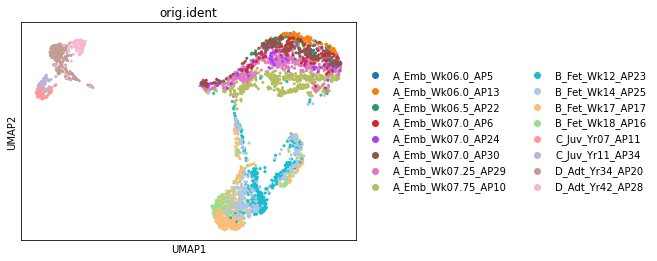

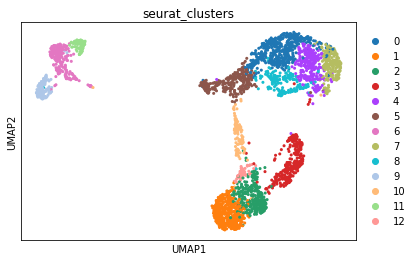

In [76]:
sc.pl.umap(adata, color='orig.ident')
sc.pl.umap(adata, color='seurat_clusters')

In [77]:
adata.write('normal_muscle.h5ad')

In [80]:
mast111 = sc.read('MAST111.loom')

/PHShome/qq06/miniconda3/envs/stream/lib/python3.6/site-packages/loompy/loom_layer.py:123: RuntimeWarning:

invalid value encountered in not_equal



## Complex trajectories

In [ ]:
adata = sc.read('normal_muscle.h5ad')
diffgene = pd.read_csv('normal_muscle_res0.8_diffgenes.csv')
adata.X = adata.X.toarray()

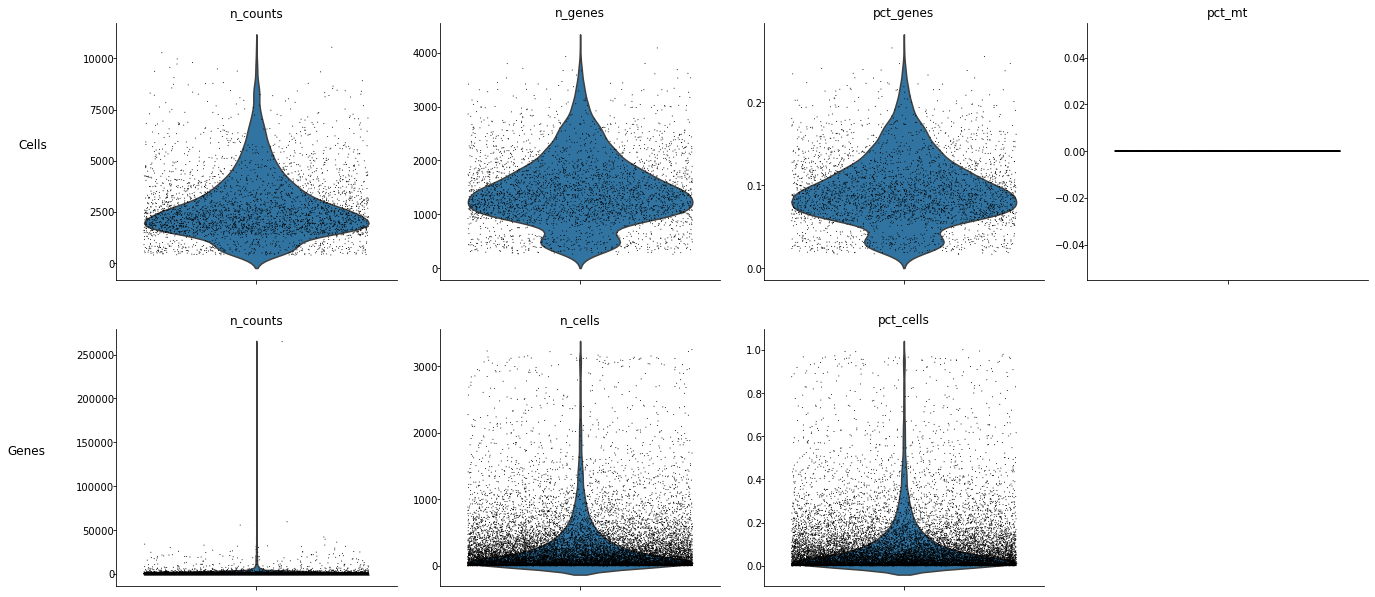

In [146]:
st.cal_qc(adata, assay='rna')
st.plot_qc(adata)

In [147]:
st.normalize(adata,method='lib_size')
st.log_transform(adata)
st.remove_mt_genes(adata)

2000 variable genes are selected


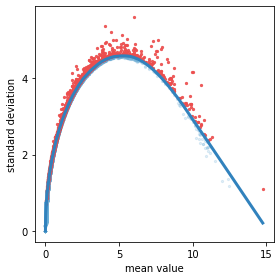

In [148]:
adata.uns['workdir'] = 'stream'
st.select_variable_genes(adata,loess_frac=0.01,n_genes=2000)

In [151]:
st.dimension_reduction(adata, method='mlle',feature='var_genes', n_components=30, nb_pct=0.025)

feature var_genes is being used ...
1 cpus are being used ...


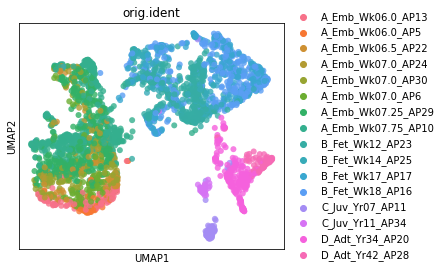

In [152]:
st.plot_visualization_2D(adata,nb_pct=0.1,color=['orig.ident'],use_precomputed=False)

In [153]:
adata_low = st.switch_to_low_dimension(adata, n_components=2)

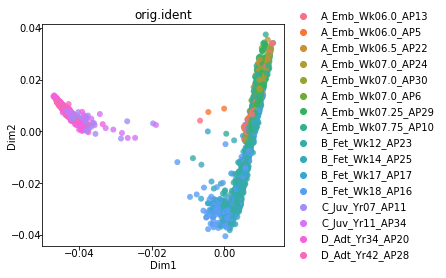

In [154]:
st.plot_dimension_reduction(adata_low,n_components=2, color=['orig.ident'])

In [155]:
st.seed_elastic_principal_graph(adata_low)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 3


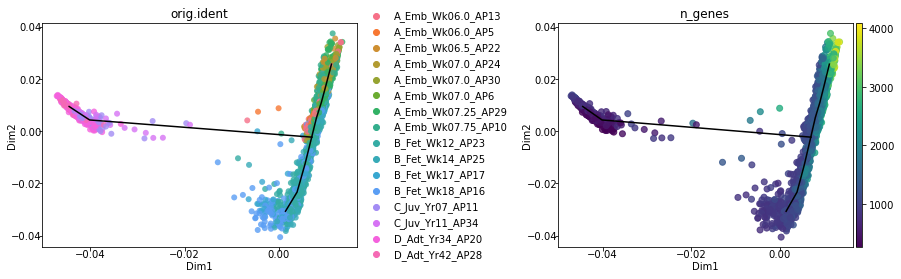

In [156]:
st.plot_dimension_reduction(adata_low,color=['orig.ident','n_genes'],n_components=2,show_graph=True,show_text=False)

In [157]:
!mkdir -p stream
st.elastic_principal_graph(adata_low)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 3251 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||50
	
8.429e-06
	
50
	
49
	
46
	
1
	
0
	
0
	
2.562e-06
	
2.154e-06
	
0.9958
	
0.9965
	
5.43e-06
	
4.373e-07
	
2.186e-05
	
0.001093
	
0


14.973 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 3


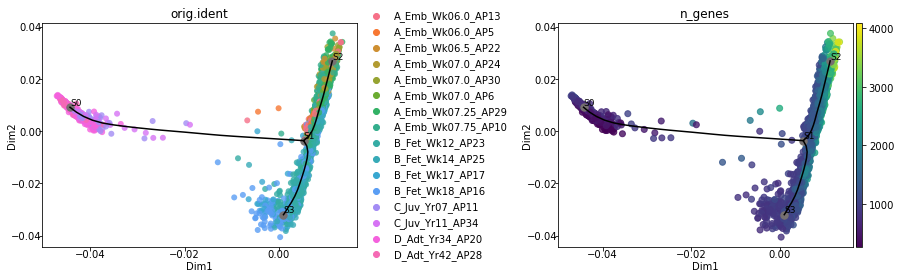

In [158]:
st.plot_dimension_reduction(adata_low,color=['orig.ident', 'n_genes'],n_components=2,show_graph=True,show_text=True)

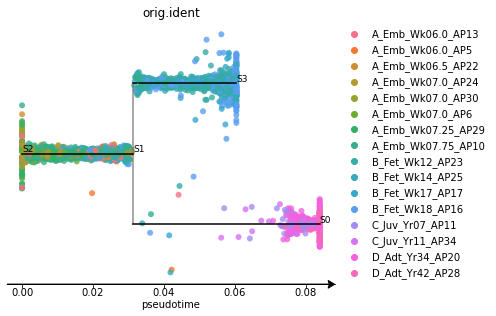

In [159]:
st.plot_stream_sc(adata_low, root='S2',color=['orig.ident'],
                  dist_scale=0.2,show_graph=True,show_text=True)

In [160]:
init_nodes_pos,init_edges = st.infer_initial_structure(adata_low)

Node 23 is calculated using 5nearest neighbor cells
Node 26 is calculated using 5nearest neighbor cells
Node 27 is calculated using 5nearest neighbor cells
Node 29 is calculated using 5nearest neighbor cells
Node 30 is calculated using 5nearest neighbor cells
Node 31 is calculated using 5nearest neighbor cells
Node 33 is calculated using 5nearest neighbor cells
Node 35 is calculated using 5nearest neighbor cells
Node 36 is calculated using 5nearest neighbor cells
Node 38 is calculated using 5nearest neighbor cells
Node 40 is calculated using 5nearest neighbor cells
Node 42 is calculated using 5nearest neighbor cells
Node 44 is calculated using 5nearest neighbor cells
Node 45 is calculated using 5nearest neighbor cells
Node 47 is calculated using 5nearest neighbor cells
Node 49 is calculated using 5nearest neighbor cells


In [161]:
st.seed_elastic_principal_graph(adata,init_nodes_pos=init_nodes_pos,init_edges=init_edges)

Seeding initial elastic principal graph...
Setting initial nodes...
The number of initial nodes is 50
Setting initial edges...
Number of initial branches: 3


Importing precomputed umap visualization ...


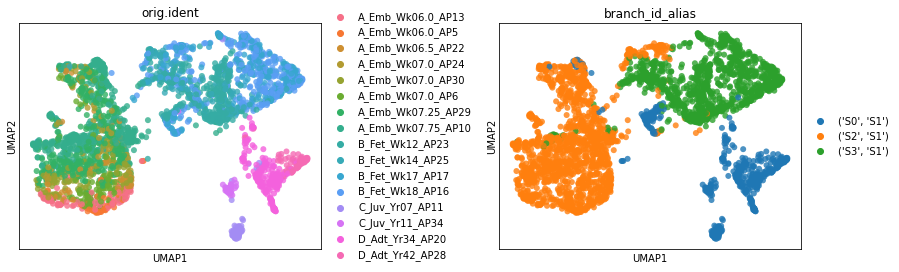

In [162]:
st.plot_visualization_2D(adata,color=['orig.ident','branch_id_alias'],fig_ncol=4)

In [163]:
st.elastic_principal_graph(adata,incr_n_nodes=10)

epg_n_nodes is too small. It is corrected to the initial number of nodes plus incr_n_nodes
Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 60 nodes on 3251 points and 30 dimensions"


[1]
 "Using a single core"


Nodes = 
50
 
51
 
52
 
53
 
54
 
55
 
56
 
57
 
58
 
59
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

3||60
	
0.006105
	
60
	
59
	
52
	
3
	
0
	
0
	
0.005273
	
0.005258
	
0.4287
	
0.4303
	
0.0005274
	
0.0003044
	
0.01826
	
1.096
	
0


20.463 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 7


Importing precomputed umap visualization ...


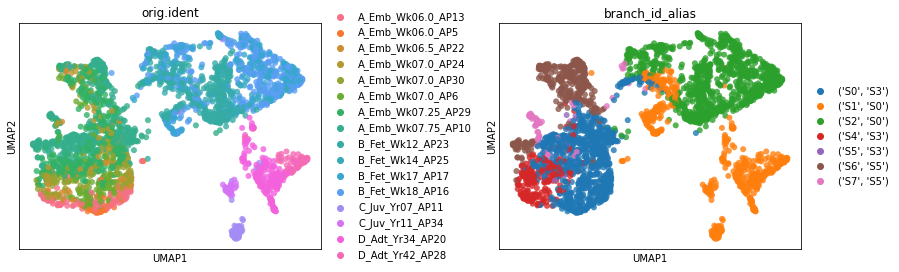

In [164]:
st.plot_visualization_2D(adata,color=['orig.ident','branch_id_alias'])

In [165]:
st.extend_elastic_principal_graph(adata)

Extending leaves with additional nodes ...
Number of branches after extending leaves: 7


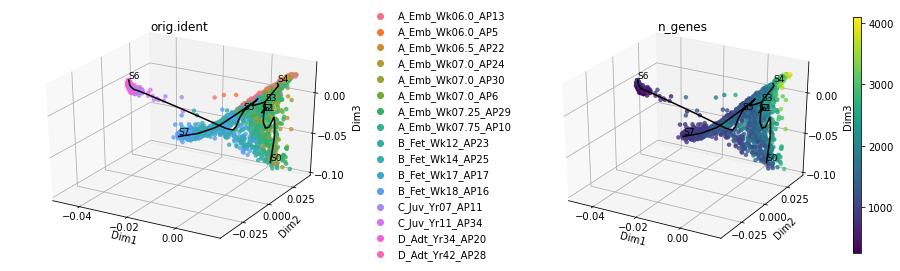

In [166]:
st.plot_dimension_reduction(adata,color=['orig.ident','n_genes'],n_components=3,show_graph=True,show_text=True)

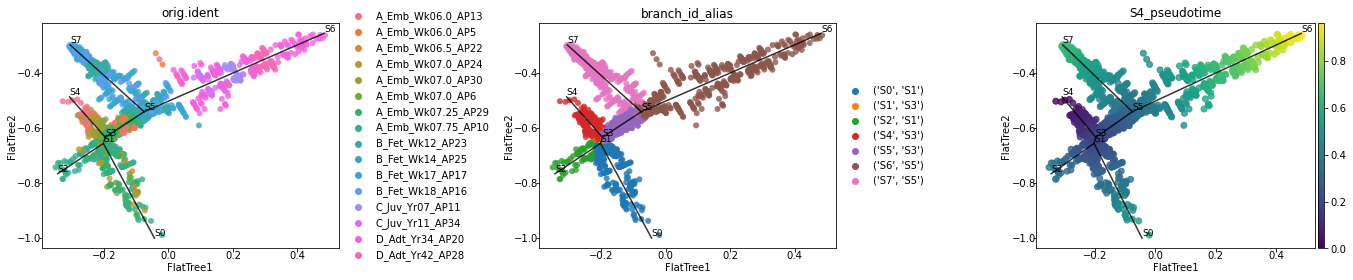

In [167]:
st.plot_flat_tree(adata,color=['orig.ident','branch_id_alias','S4_pseudotime'],
                  dist_scale=0.3, show_graph=True, show_text=True)

In [168]:
adata.obs['label'] = adata.obs.loc[:, 'orig.ident']

In [138]:
adata.obs['label2'] = adata.obs.loc[:, 'seurat_clusters']

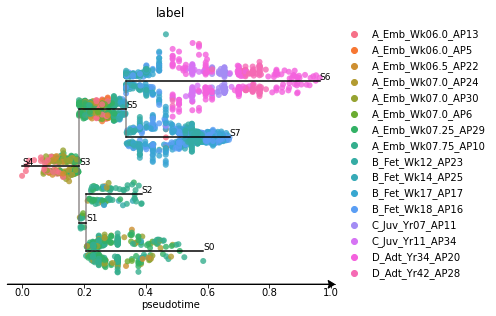

In [170]:
st.plot_stream_sc(adata,root='S4',dist_scale=0.5)

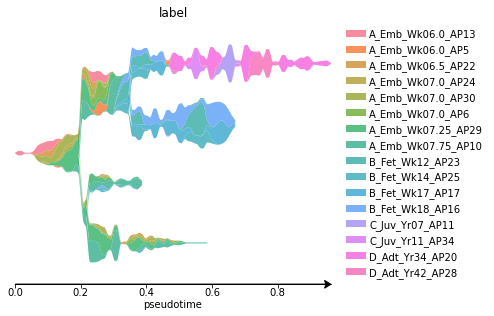

In [171]:
st.plot_stream(adata,root='S4',log_scale=True,factor_min_win=1.2)

## Bifurcation

In [246]:
adata = sc.read('normal_muscle.h5ad')
diffgene = pd.read_csv('normal_muscle_res0.8_diffgenes.csv')
adata.X = adata.X.toarray()

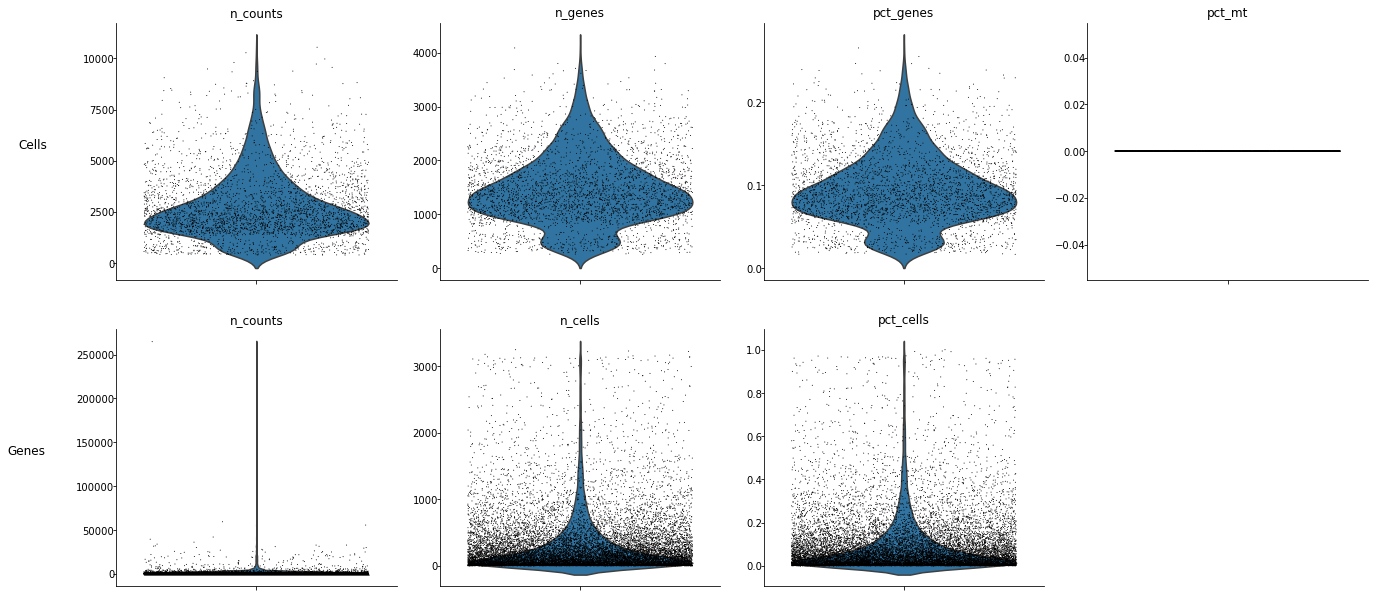

In [247]:
st.cal_qc(adata, assay='rna')
st.plot_qc(adata)

In [249]:
st.filter_cells(adata,min_n_features= 100)
st.filter_features(adata,min_n_cells = 5)

filter cells based on min_n_features
after filtering out low-quality cells: 
3251 cells, 14499 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
3251 cells, 14499 genes


In [250]:
###Normalize gene expression based on library size  
st.normalize(adata,method='lib_size')
###Logarithmize gene expression 
st.log_transform(adata)
###Remove mitochondrial genes 
st.remove_mt_genes(adata)

2900 variable genes are selected


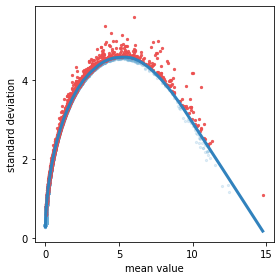

In [251]:
adata.uns['workdir'] = 'stream'
st.select_variable_genes(adata,loess_frac=0.01,percentile=80)

using top variable genes ...
15 PCs are selected


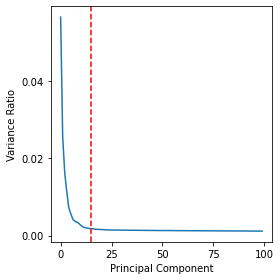

In [252]:
st.select_top_principal_components(adata,feature='var_genes',n_pc=15, first_pc=True)

In [253]:
st.dimension_reduction(adata,method='umap',feature='top_pcs',
                       n_components=2, n_neighbors=10, n_jobs=4)

feature top_pcs is being used ...
4 cpus are being used ...


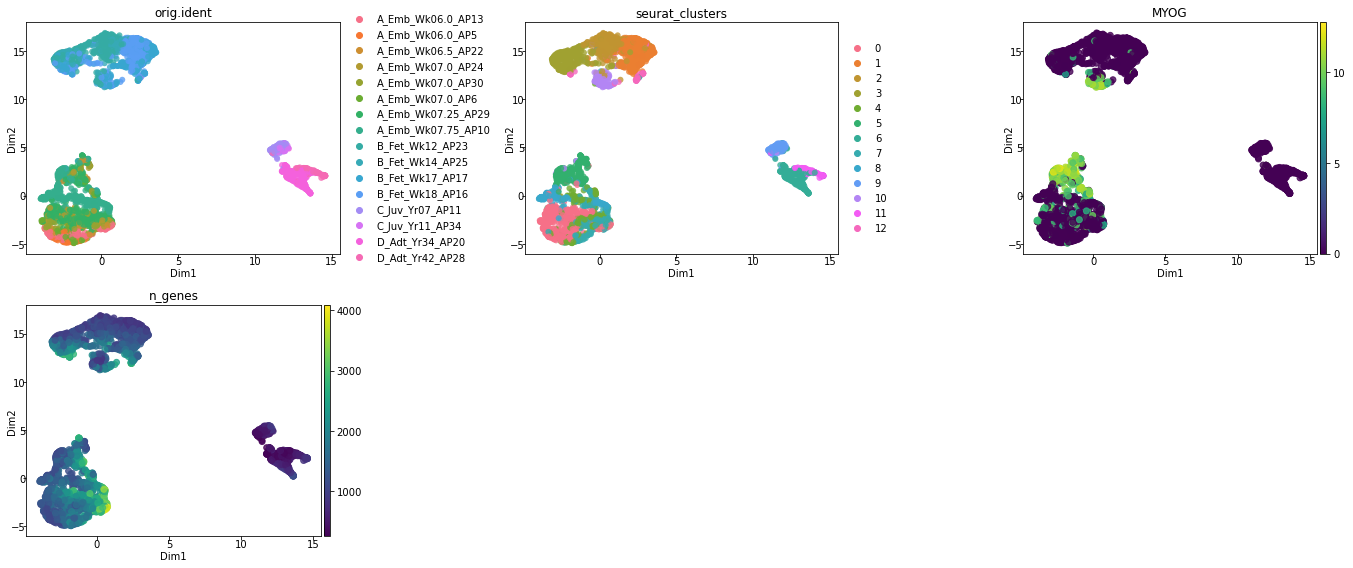

In [282]:
st.plot_dimension_reduction(adata, 
                            color=['orig.ident', 'seurat_clusters', 'MYOG','n_genes'],
                            n_components=2,show_graph=False,
                            show_text=False)

In [272]:
st.seed_elastic_principal_graph(adata,n_clusters=10)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 3


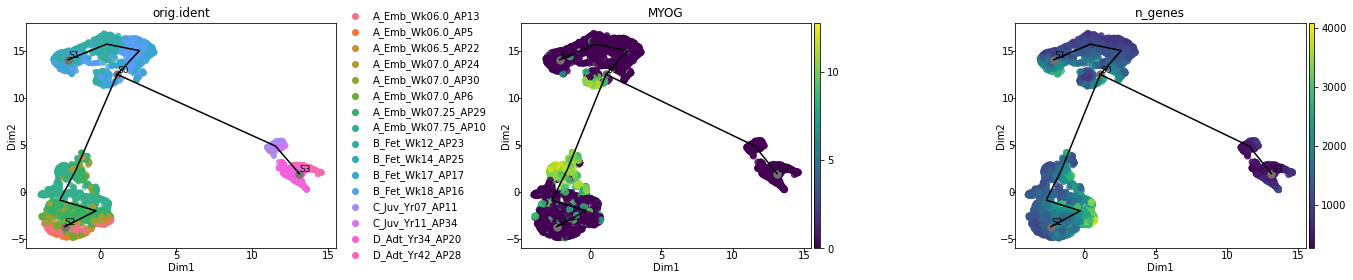

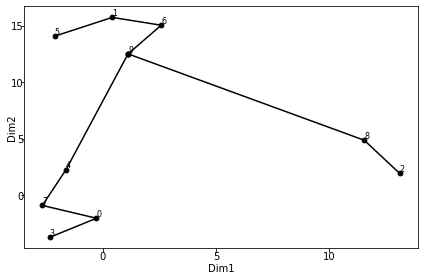

In [273]:
st.plot_dimension_reduction(adata,color=['orig.ident',
                                         'MYOG','n_genes'],
                            n_components=2,
                            show_graph=True,
                            show_text=True)
st.plot_branches(adata,show_text=True)

In [274]:
st.elastic_principal_graph(adata,epg_alpha=0.01,
                           epg_mu=0.05,epg_lambda=0.05)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 3251 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

3||50
	
2.554
	
50
	
49
	
42
	
3
	
0
	
0
	
0.9394
	
0.9149
	
0.9886
	
0.9889
	
1.523
	
0.09128
	
4.564
	
228.2
	
0


12.954 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 7


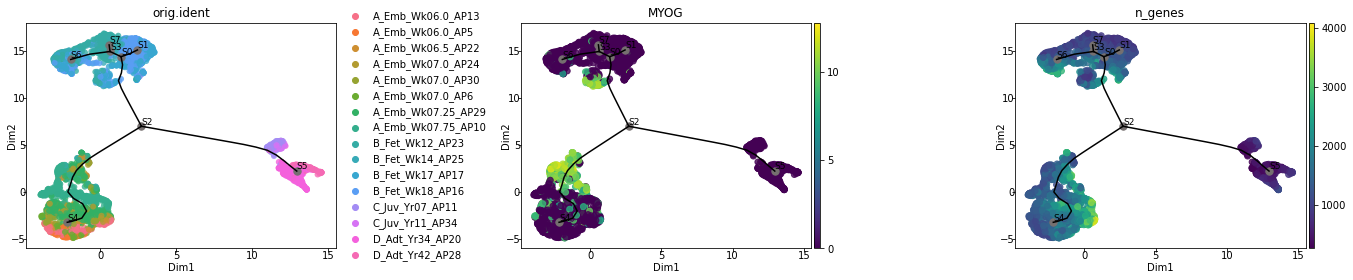

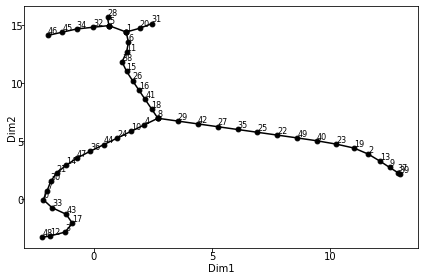

In [279]:
st.plot_dimension_reduction(adata,color=['orig.ident',
                                         'MYOG','n_genes'],
                            n_components=2,show_graph=True,
                            show_text=True)
st.plot_branches(adata,show_text=True)

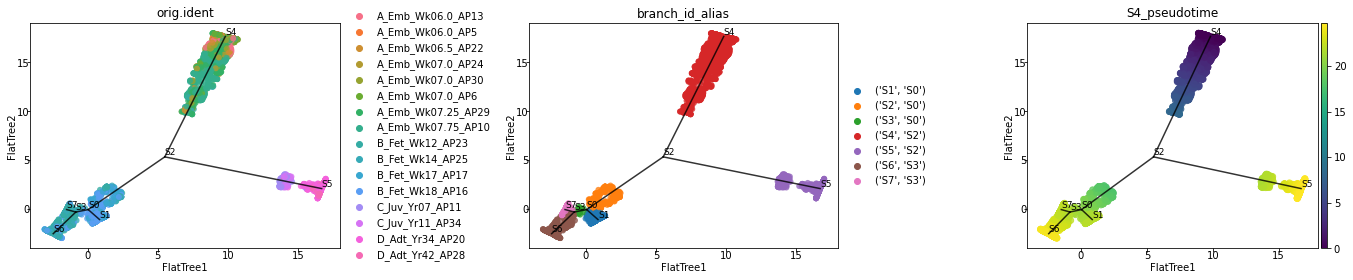

In [276]:
st.plot_flat_tree(adata,color=['orig.ident',
                               'branch_id_alias','S4_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

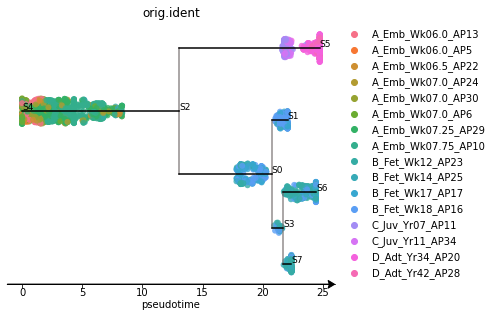

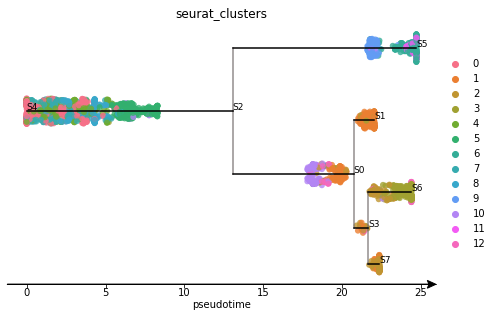

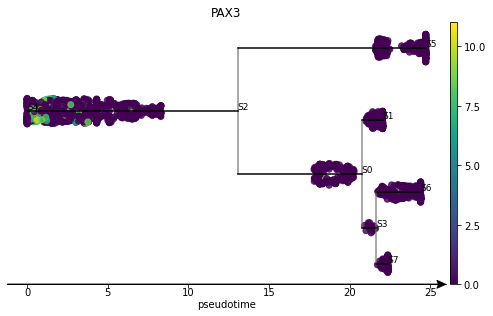

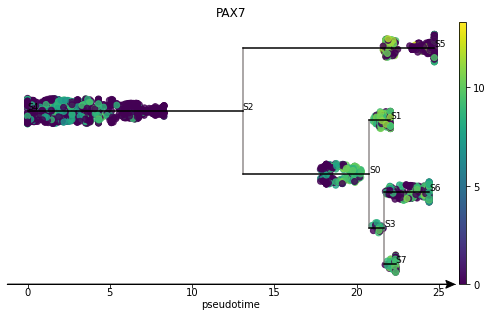

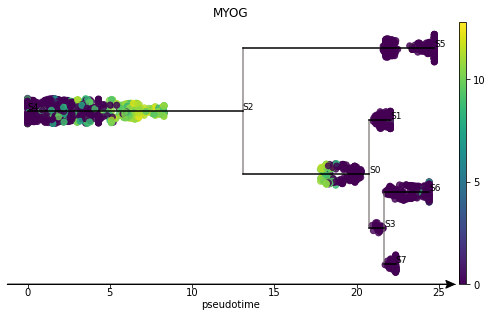

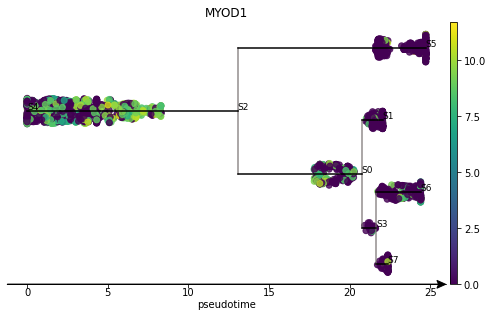

In [283]:
st.plot_stream_sc(adata,root='S4',color=['orig.ident', 'seurat_clusters',
                                         'PAX3', 'PAX7', 'MYOG', 'MYOD1'],
                  dist_scale=0.3,show_graph=True,show_text=True)

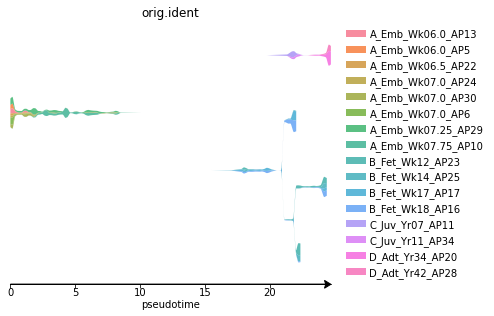

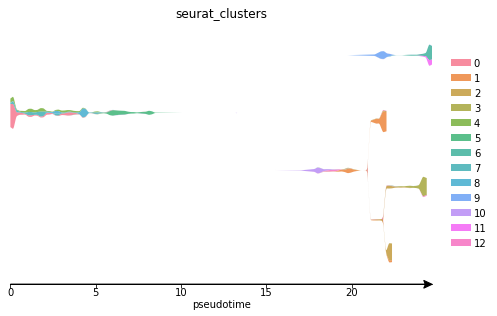

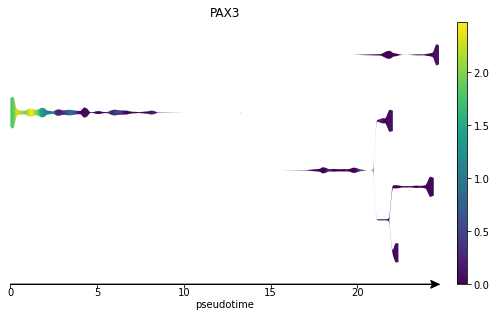

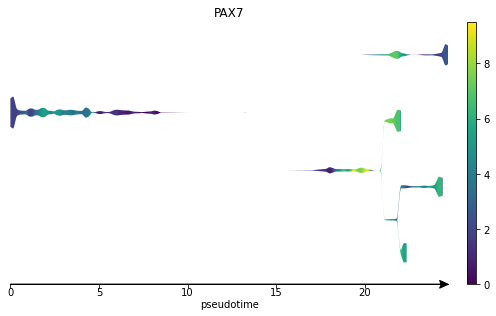

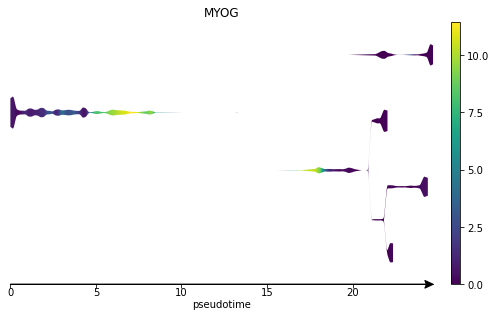

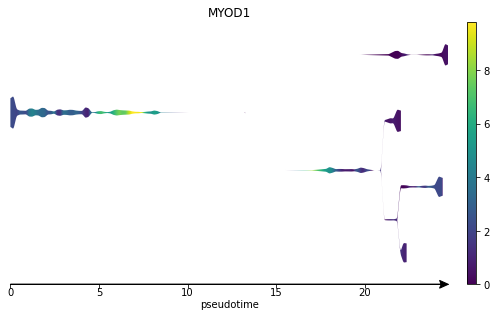

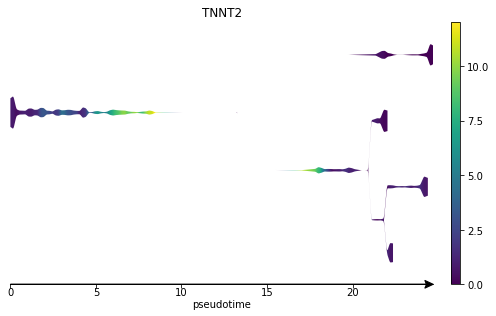

In [278]:
st.plot_stream(adata,root='S4',color=['orig.ident',
                                      'seurat_clusters',
                                      'PAX3', 'PAX7', 'MYOG', 
                                      'MYOD1', 'TNNT2'],
               dist_scale=0.5,factor_num_win=1.5)

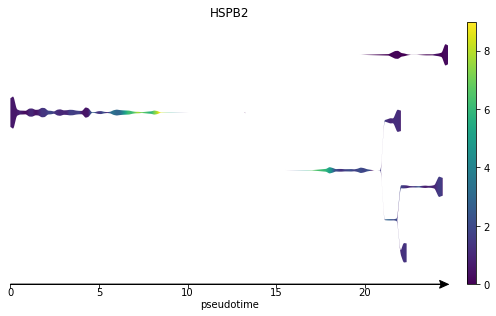

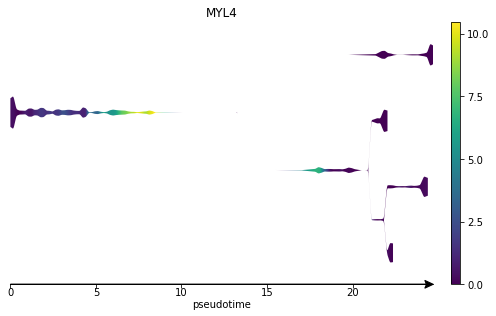

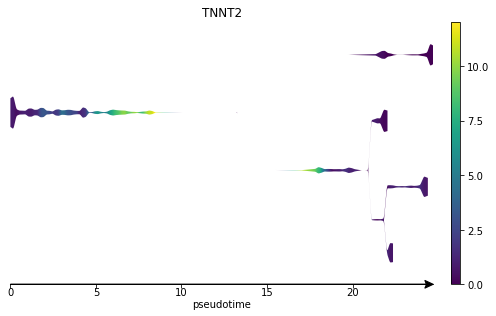

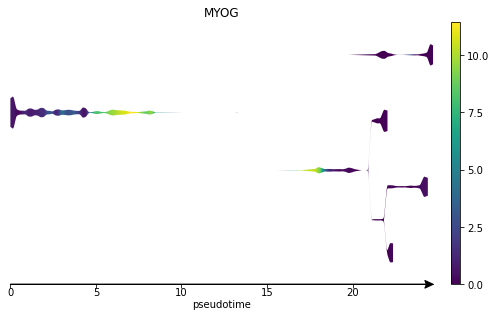

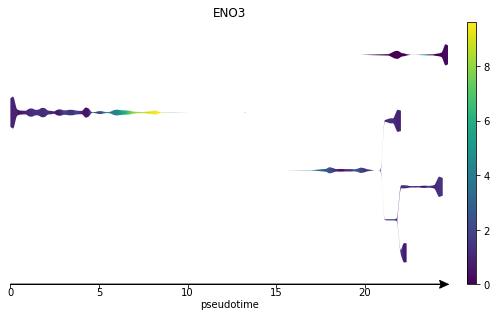

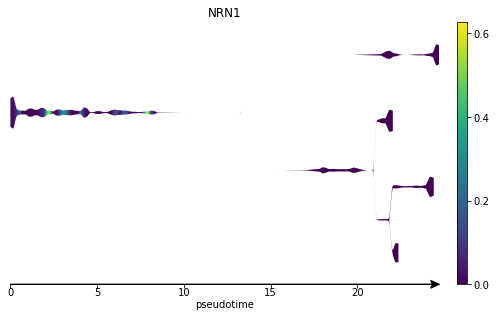

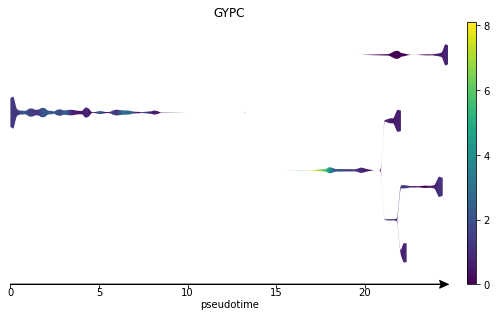

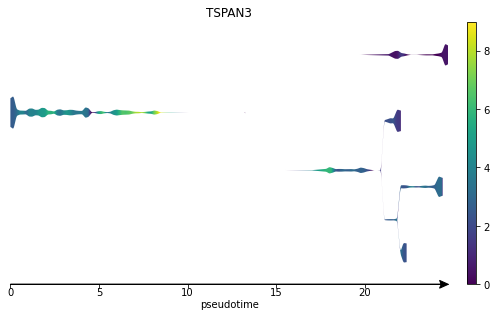

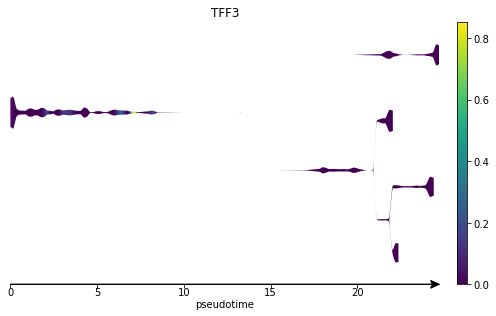

In [285]:
st.plot_stream(adata,root='S4',color=["HSPB2", "MYL4", "TNNT2", "MYOG", "ENO3", "NRN1", "GYPC", "TSPAN3", "TFF3"],
               dist_scale=0.5,factor_num_win=1.5)

In [286]:
st.write(adata,file_name='normal_muscle_stream_result.pkl')